# Import and setup

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Dataset/crypto_price_movement_dataset.csv')
df.head()

,Date,Open_Price,Close_Price,High_Price,Low_Price,Price_Change,Volume,MA_5,MA_10,RSI,Volatility,Sentiment_Score,Global_Economy,Event_Impact,Price_Movement
0,2023-01-01,41236.203565,41583.440143,42164.219187,41514.228466,347.236578,6746503,0.000000,0.0,39.782970,0.011679,0.806251,1,0.052810,1
1,2023-01-02,58521.429192,58515.946236,59042.917886,57930.249488,-5.482956,6569064,0.000000,0.0,52.667760,0.042812,0.010386,0,0.082150,0
2,2023-01-03,51959.818254,51655.283865,52006.320815,50856.415124,-304.534389,8066677,0.000000,0.0,30.473258,0.031347,0.555665,1,0.092787,0
3,2023-01-04,47959.754526,48196.396313,48689.608970,47431.923218,236.641787,8759881,0.000000,0.0,54.708497,0.038986,-0.563440,0,0.079497,1
4,2023-01-05,34680.559213,34599.237349,34964.333984,33761.841141,-81.321864,7696906,46910.060781,0.0,30.916759,0.045281,0.242467,0,0.064309,0


# Exploratory Data Analysis 

## Data pre-processing

In [24]:
print(df.isnull().sum())

Date               0
Open_Price         0
Close_Price        0
High_Price         0
Low_Price          0
Price_Change       0
Volume             0
MA_5               0
MA_10              0
RSI                0
Volatility         0
Sentiment_Score    0
Global_Economy     0
Event_Impact       0
Price_Movement     0
dtype: int64


In [25]:
print(df.dtypes)

Date                object
Open_Price         float64
Close_Price        float64
High_Price         float64
Low_Price          float64
Price_Change       float64
Volume               int64
MA_5               float64
MA_10              float64
RSI                float64
Volatility         float64
Sentiment_Score    float64
Global_Economy       int64
Event_Impact       float64
Price_Movement       int64
dtype: object


In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes

Date               datetime64[ns]
Open_Price                float64
Close_Price               float64
High_Price                float64
Low_Price                 float64
Price_Change              float64
Volume                      int64
MA_5                      float64
MA_10                     float64
RSI                       float64
Volatility                float64
Sentiment_Score           float64
Global_Economy              int64
Event_Impact              float64
Price_Movement              int64
dtype: object

# Data Exploration

## Target Analysis

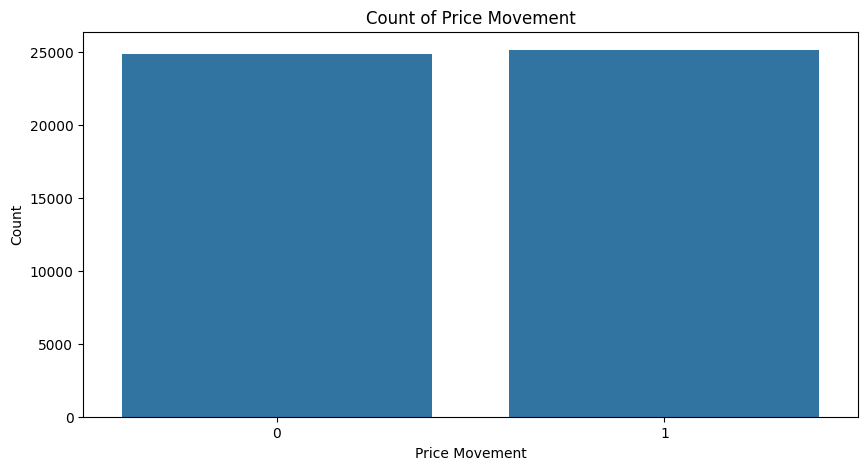

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Price_Movement', data=df)
plt.title('Count of Price Movement')
plt.xlabel('Price Movement')
plt.ylabel('Count')
plt.show()

The below code is needed to create copies of grouping of dates by quarter and year, since the number of years too huge. This would make it difficult to indicate to display for each date in a graph like format

In [28]:
# Group by quarter and calculate the mean of prices
df_quarter = df.set_index('Date').resample('Q').mean().reset_index()
df_year = df.set_index('Date').resample('Y').mean().reset_index()
df_month = df.set_index('Date').resample('M').mean().reset_index()

## Trend Analysis

#### Direct Crypto Price

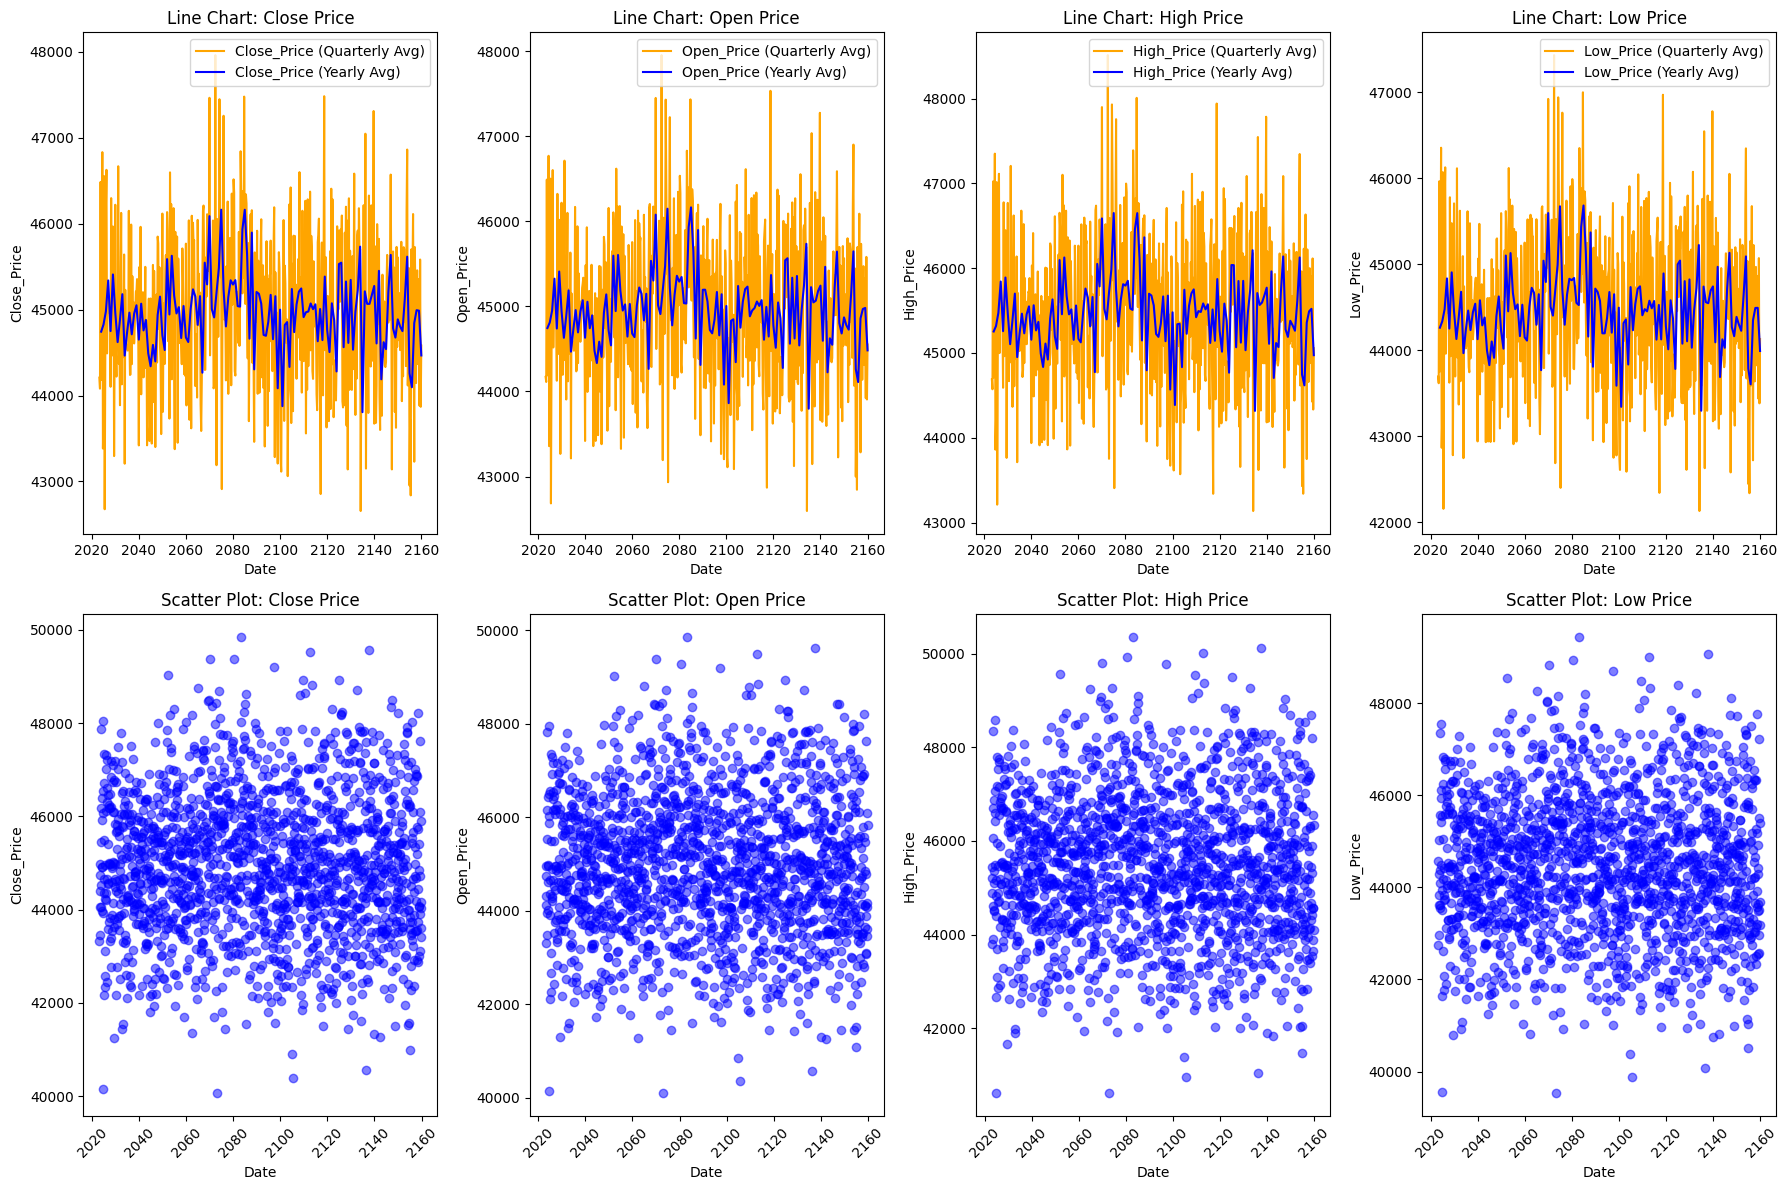

In [29]:
# Define the parameters and their descriptive titles
params = ['Close_Price', 'Open_Price', 'High_Price', 'Low_Price']
titles  = ['Close Price', 'Open Price', 'High Price', 'Low Price']

plt.figure(figsize=(18, 12))

# Plot line charts using quarterly and yearly resampled data (top row)
for i, param in enumerate(params):
    plt.subplot(2, 4, i+1)
    plt.plot(df_quarter['Date'], df_quarter[param], label=f'{param} (Quarterly Avg)', color='orange')
    plt.plot(df_year['Date'], df_year[param], label=f'{param} (Yearly Avg)', color='blue')
    plt.title(f'Line Chart: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.legend()

# Plot scatter plots using monthly resampled data (bottom row)
for i, param in enumerate(params):
    plt.subplot(2, 4, i+5)
    plt.scatter(df_month['Date'], df_month[param], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

#### Parametrics Indicators

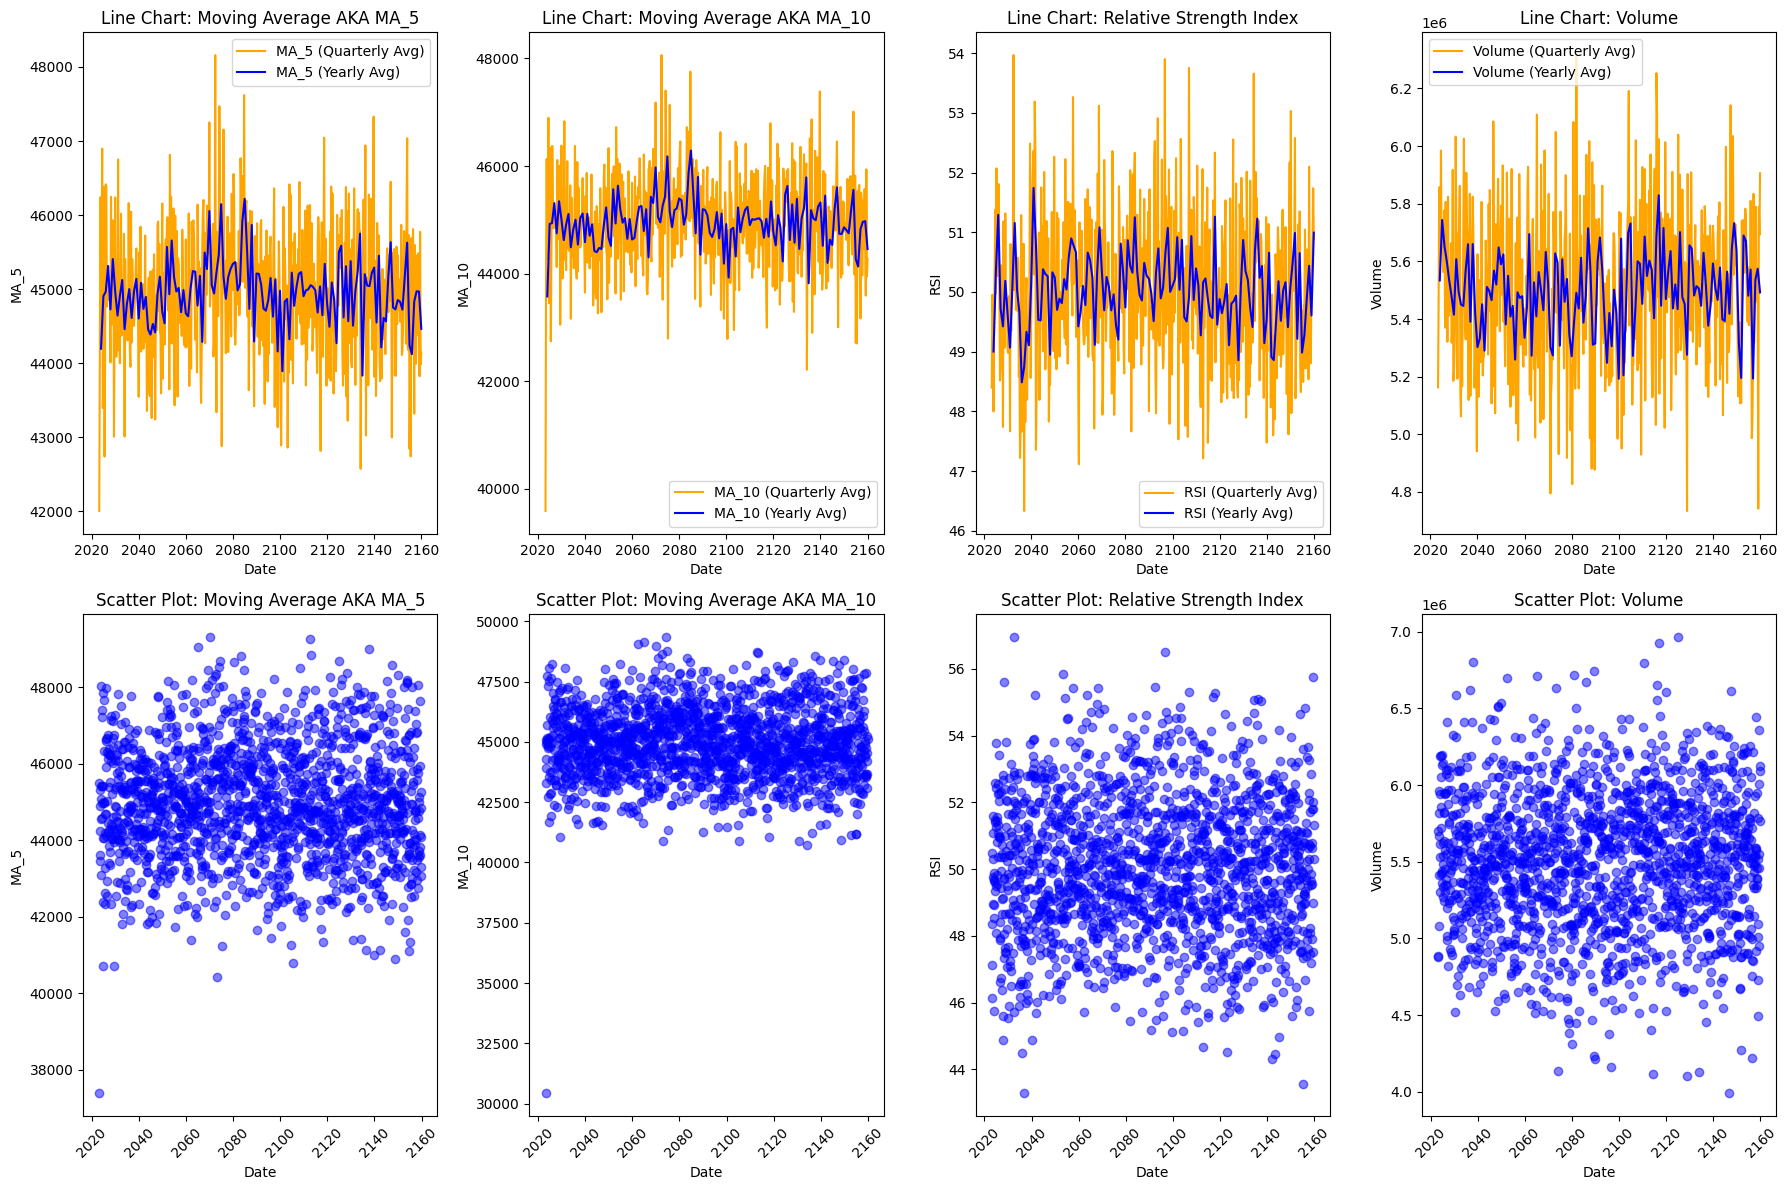

In [30]:
# Updated parameters and their descriptive titles to include Volume
params = ['MA_5', 'MA_10', 'RSI', 'Volume']
titles = ['Moving Average AKA MA_5', 'Moving Average AKA MA_10', 'Relative Strength Index', 'Volume']

plt.figure(figsize=(18, 12))

# Plot line charts using quarterly and yearly resampled data (top row)
for i, param in enumerate(params):
    plt.subplot(2, 4, i+1)
    plt.plot(df_quarter['Date'], df_quarter[param], label=f'{param} (Quarterly Avg)', color='orange')
    plt.plot(df_year['Date'], df_year[param], label=f'{param} (Yearly Avg)', color='blue')
    plt.title(f'Line Chart: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.legend()

# Plot scatter plots using monthly resampled data (bottom row)
for i, param in enumerate(params):
    plt.subplot(2, 4, i+5)
    plt.scatter(df_month['Date'], df_month[param], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


#### External and Behavioral

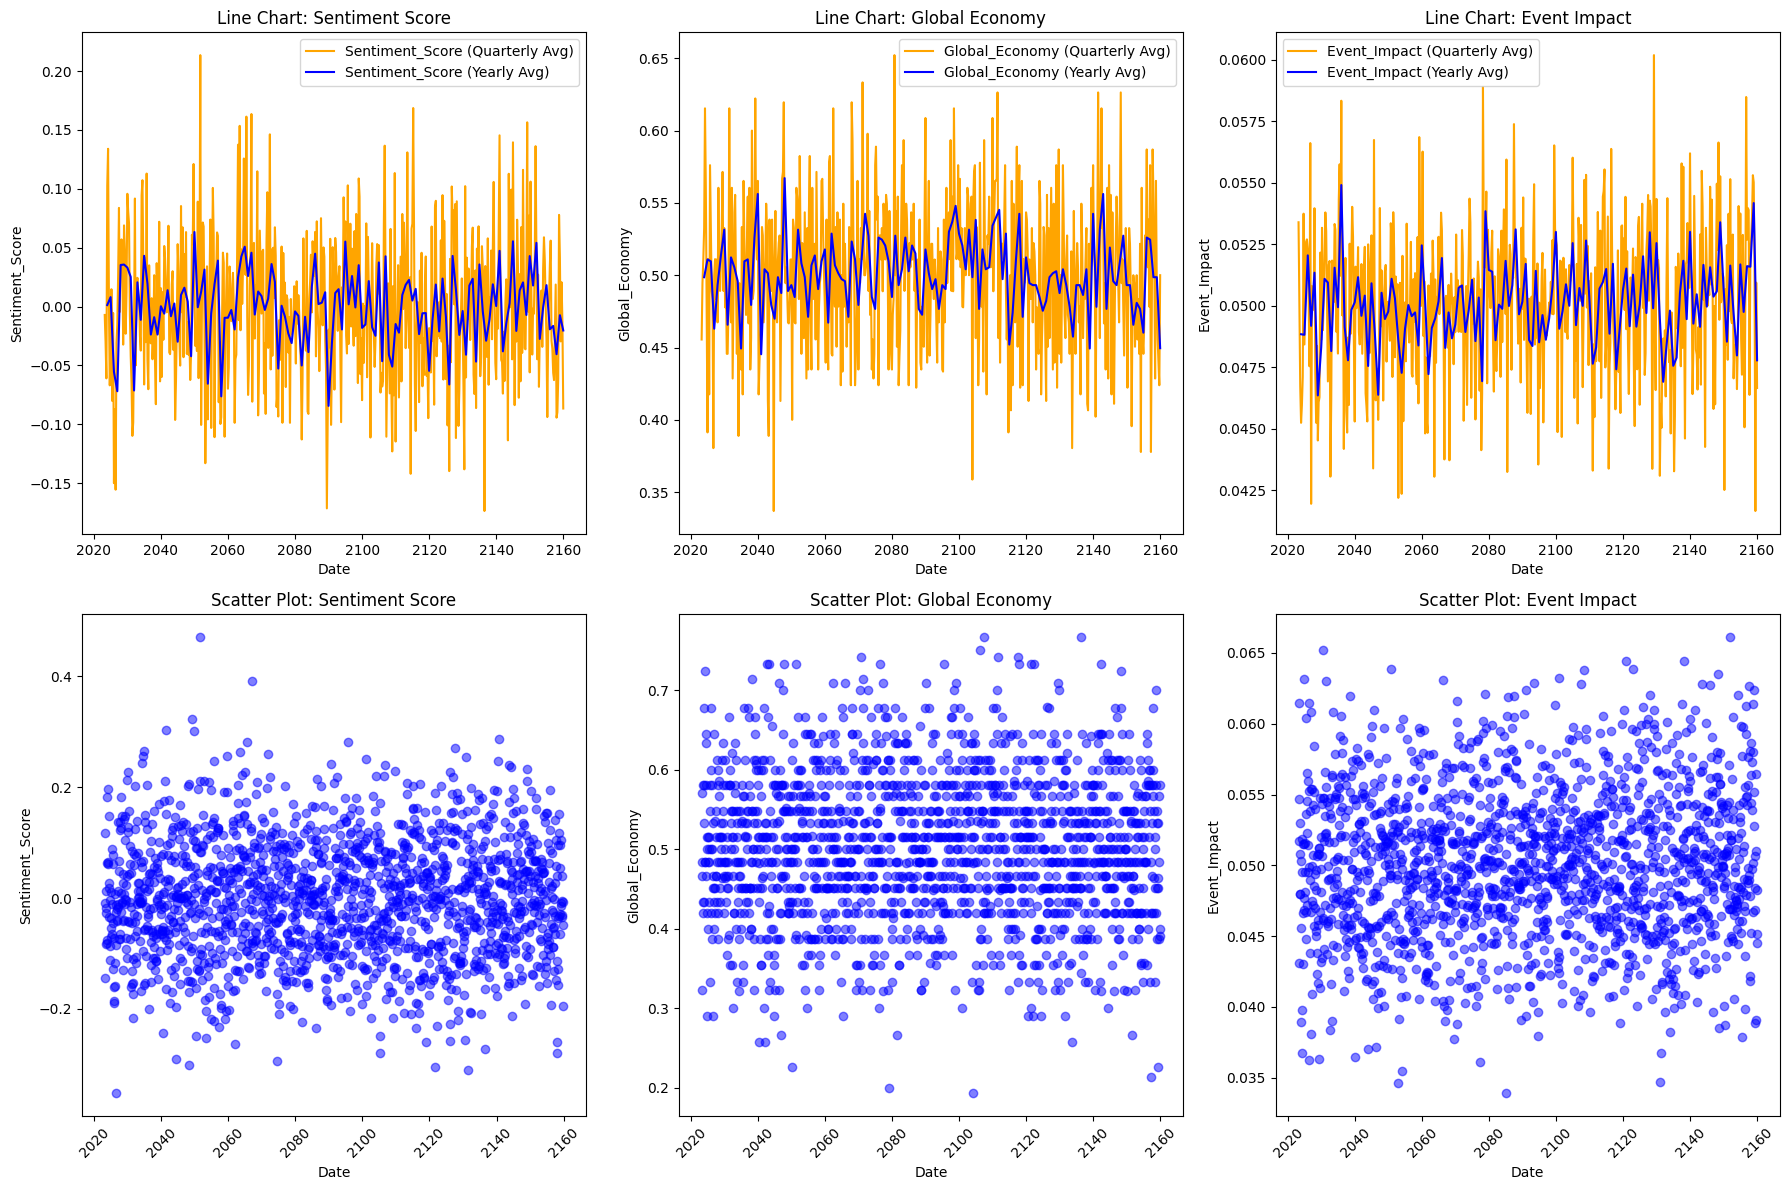

In [31]:
# Define the parameters and their descriptive titles
params = ['Sentiment_Score', 'Global_Economy', 'Event_Impact']
titles = ['Sentiment Score', 'Global Economy', 'Event Impact']

plt.figure(figsize=(18, 12))

# Plot line charts using quarterly and yearly resampled data (top row)
for i, param in enumerate(params):
    plt.subplot(2, 3, i+1)
    plt.plot(df_quarter['Date'], df_quarter[param], label=f'{param} (Quarterly Avg)', color='orange')
    plt.plot(df_year['Date'], df_year[param], label=f'{param} (Yearly Avg)', color='blue')
    plt.title(f'Line Chart: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.legend()

# Plot scatter plots using monthly resampled data (bottom row)
for i, param in enumerate(params):
    plt.subplot(2, 3, i+4)
    plt.scatter(df_month['Date'], df_month[param], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot: {titles[i]}')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

The trends reveal the following information: 

1. No sustained upward/downward drift: All series hover around a constant mean.

2. No clear seasonality: Quarterly swings look random rather than cyclical.

3. Stable variance: The amplitude of the quarterly fluctuations doesn’t grow or shrink over time.


This only means that further data analysis on the overall trend needs to be done, to gain further insights on how their movement actually is. 

## Tests on data trends

### ADF (Augmented Dickey–Fuller) test

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test_all(data):
    results = []
    for col in data.columns:
        if col == 'Date':
            continue
        series = data[col].dropna()
        try:
            result = adfuller(series)
            results.append({
                'Feature': col,
                'ADF Statistic': result[0],
                'p-value': result[1],
                '1% Critical': result[4]['1%'],
                '5% Critical': result[4]['5%'],
                '10% Critical': result[4]['10%']
            })
        except Exception as e:
            results.append({
                'Feature': col,
                'ADF Statistic': None,
                'p-value': None,
                '1% Critical': None,
                '5% Critical': None,
                '10% Critical': None,
                'Error': str(e)
            })
    return pd.DataFrame(results)

adf_results = adf_test_all(df)
print(adf_results.to_string(index=False))

        Feature  ADF Statistic  p-value  1% Critical  5% Critical  10% Critical
     Open_Price    -223.548056      0.0    -3.430481    -2.861598     -2.566801
    Close_Price    -223.552247      0.0    -3.430481    -2.861598     -2.566801
     High_Price    -223.491795      0.0    -3.430481    -2.861598     -2.566801
      Low_Price    -223.572564      0.0    -3.430481    -2.861598     -2.566801
   Price_Change    -225.436021      0.0    -3.430481    -2.861598     -2.566801
         Volume    -224.579563      0.0    -3.430481    -2.861598     -2.566801
           MA_5     -28.119202      0.0    -3.430481    -2.861598     -2.566801
          MA_10     -28.092087      0.0    -3.430481    -2.861598     -2.566801
            RSI    -222.480967      0.0    -3.430481    -2.861598     -2.566801
     Volatility    -225.591740      0.0    -3.430481    -2.861598     -2.566801
Sentiment_Score    -224.138753      0.0    -3.430481    -2.861598     -2.566801
 Global_Economy    -222.278091      0.0 

The ADF test outputs indicate that for every feature:
- The ADF Statistic is extremely low (much lower than the 1%, 5%, and 10% critical values).
- The p-values are effectively 0.

This implies that we can strongly reject the null hypothesis of a unit root for all features. In other words, all the time series in the dataset are stationary.

Stationarity is important when modeling time series data because it means that the statistical properties (mean, variance, etc.) remain constant over time. This improves the performance and reliability of subsequent modeling techniques, such as forecasting methods (e.g., ARIMA) or deep learning models (e.g., LSTM). The stationarity observed here assures us that no additional differencing or detrending is required for most modeling applications.

### ACF and PACF Tests

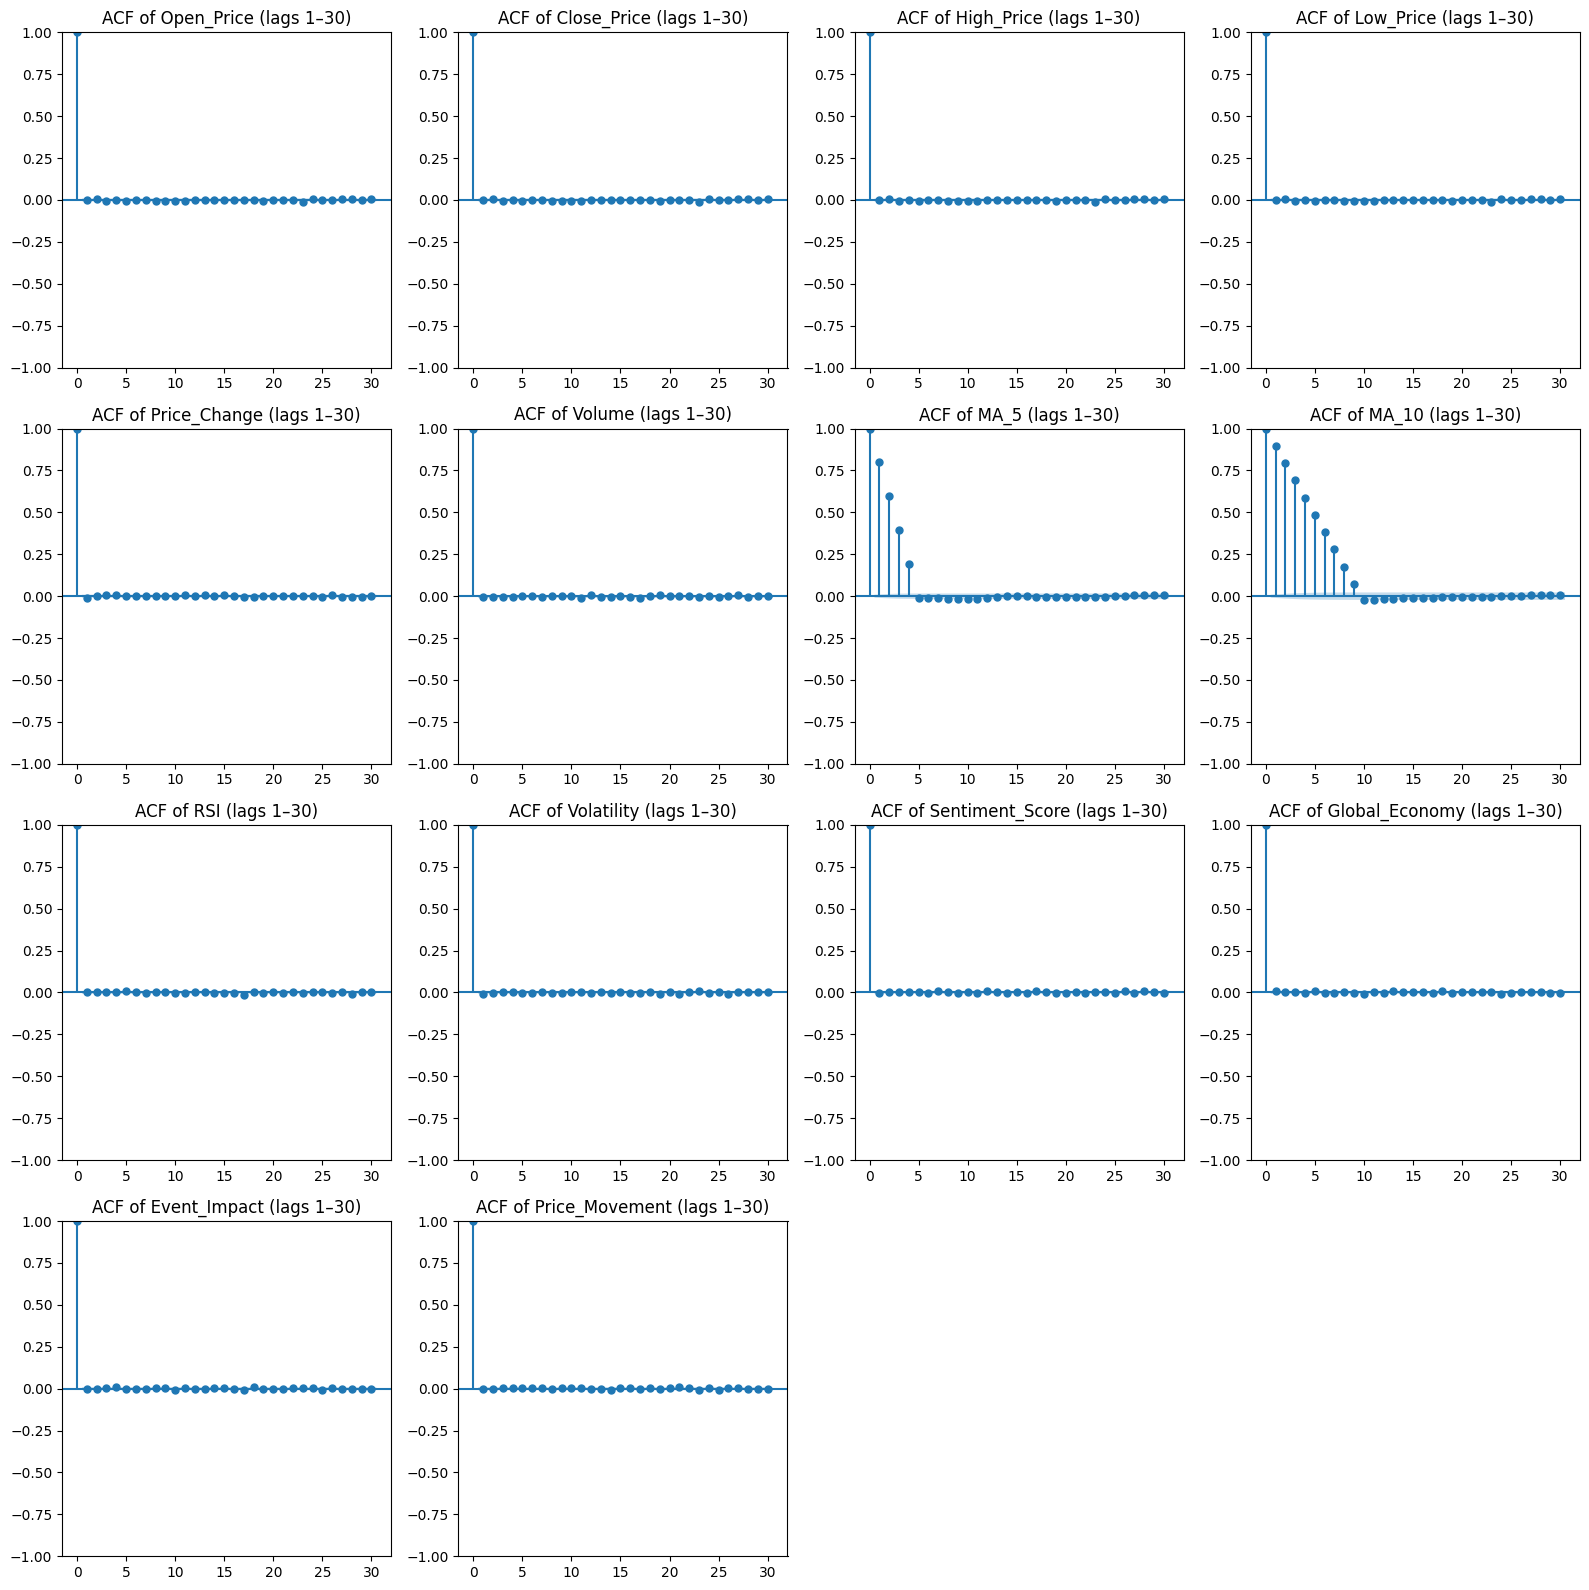

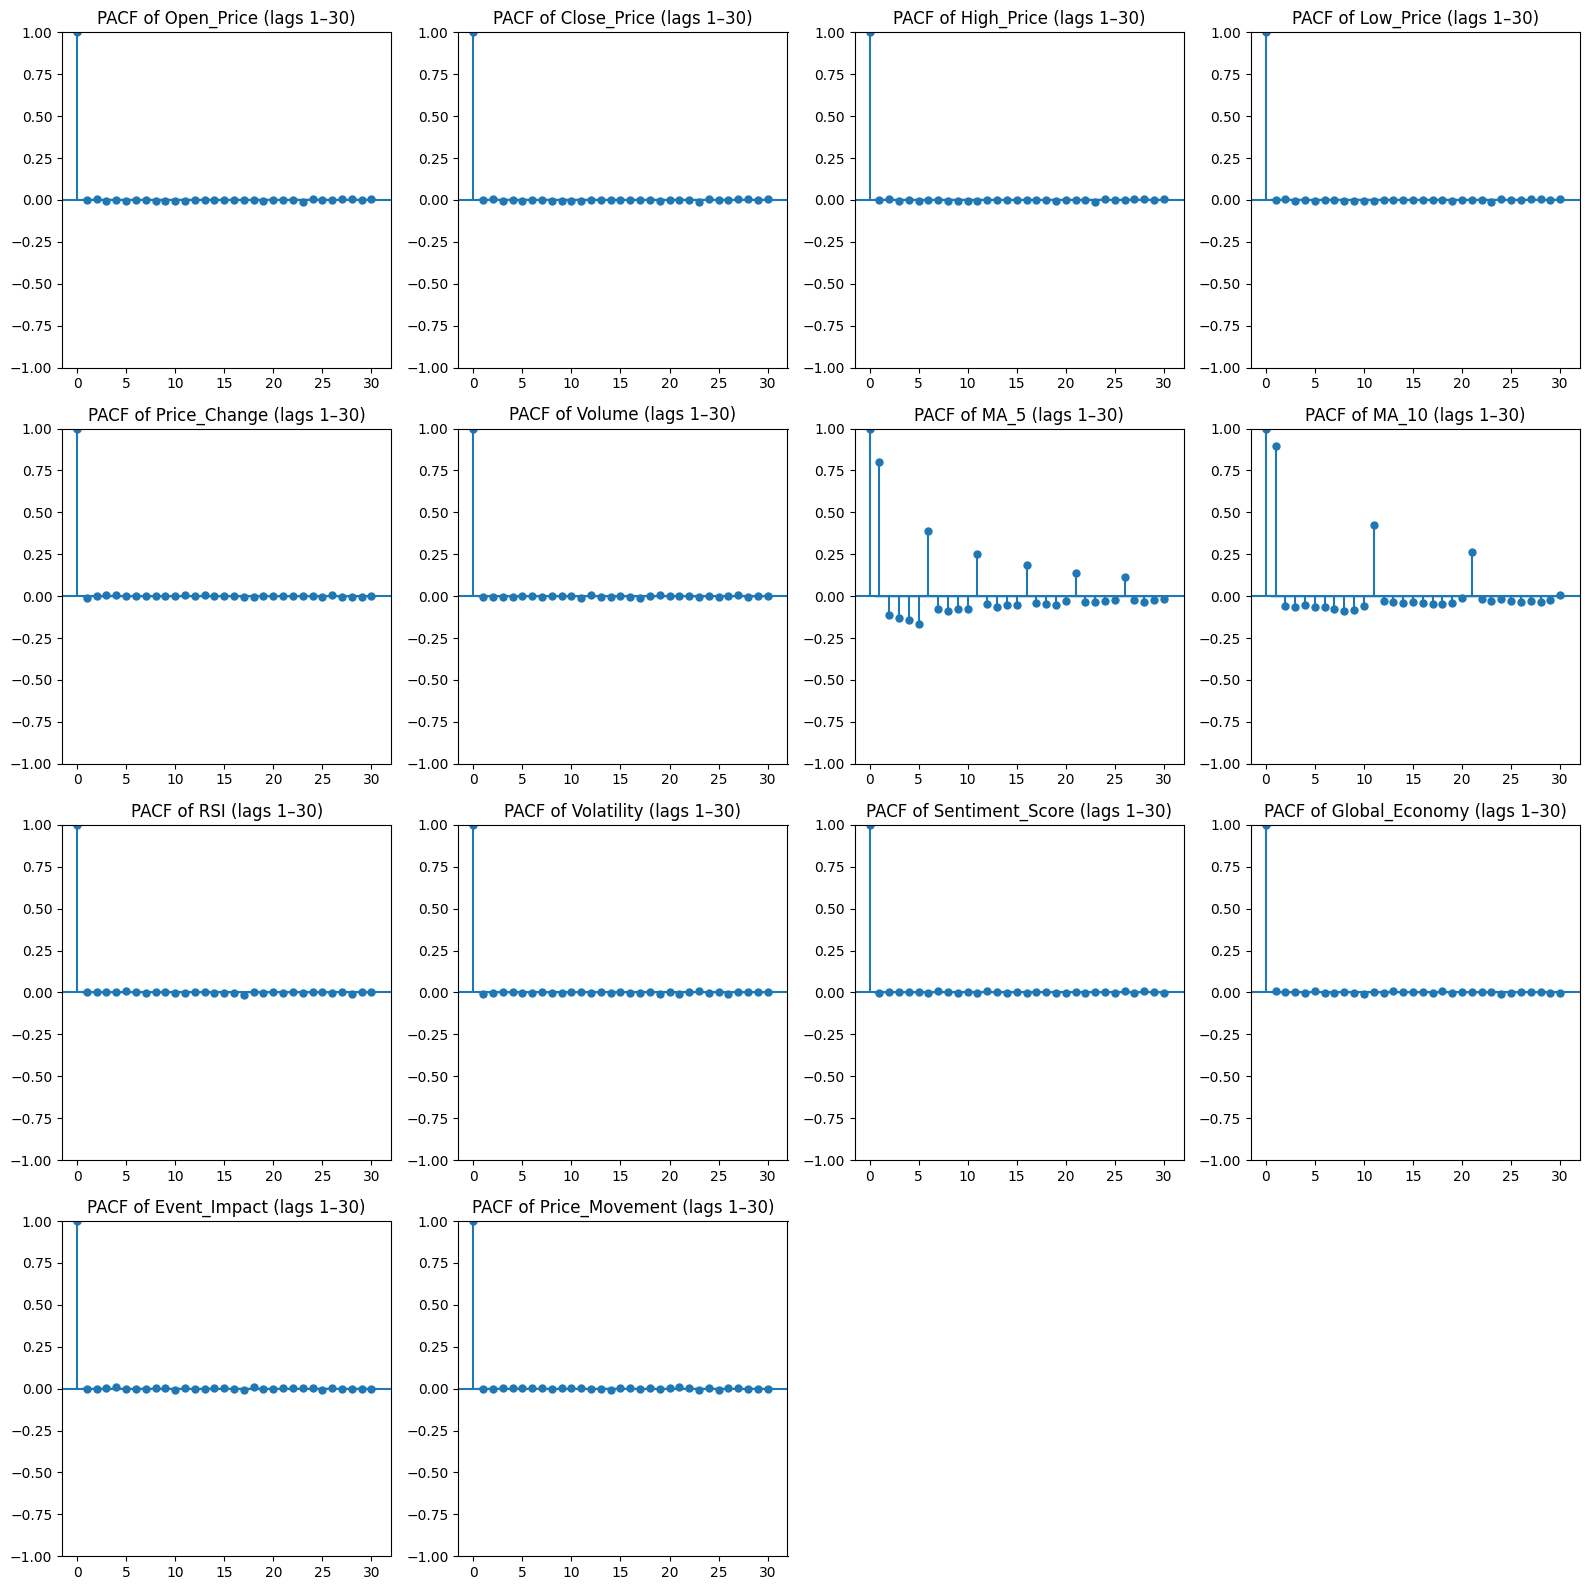

In [33]:
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


features = df.columns.tolist()
features.remove('Date')

# Determine grid size (4 plots per row)
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

# Plot ACF for each feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    plot_acf(df[feature], lags=30, ax=axes[i])
    axes[i].set_title(f'ACF of {feature} (lags 1–30)')

# Turn off any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plot PACF for each feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    plot_pacf(df[feature], lags=30, ax=axes[i])
    axes[i].set_title(f'PACF of {feature} (lags 1–30)')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots helps understand the dependence structure in this time series data. Here’s the intuition:

- The ACF plot shows how past values are correlated with the current value over various lags, while the PACF shows the direct correlation at each lag after removing effects from all shorter lags.
- When both plots quickly drop to 0 (stabilize at zero), it suggests that there isn’t significant autocorrelation beyond a certain lag. This indicates that the series does not strongly depend on many past values.
- For LSTM or other RNN models, knowing that autocorrelation dies out quickly means that very long input sequences might not be necessary, and I can focus on a key window of past data.
- **A lag of 30 is chosen because it is large enough to capture any potential monthly seasonal patterns or short-term dependencies, yet small enough to avoid including noise or redundant information.**

This insight assists in configuring the sequence length (window size) for LSTM inputs and helps simplify the model by avoiding unnecessarily long historical windows.

Key takeaway from ACF/PACF:

All the time series are stationary and show virtually zero autocorrelation at lags > 0—except for the two moving‑average features.

MA_5 has significant autocorrelation out to lag 4 (ACF) and partial spikes at lags 1–2 (PACF).

MA_10 shows autocorrelation through lag 8 and PACF spikes at lag 1 (and weaker at 10 and 20).

#### Creating Dataframe with lags

In [34]:
# Create lagged features for MA_5 (up to lag 4) and MA_10 (up to lag 8)
for lag in range(1, 5):
    df[f'MA_5_lag_{lag}'] = df['MA_5'].shift(lag)

for lag in range(1, 9):
    df[f'MA_10_lag_{lag}'] = df['MA_10'].shift(lag)

# Drop rows with NaN values (from the lagging operation)
df_with_lags = df.dropna()

print(f"Original shape: {df.shape}")
print(f"Shape after adding lags and dropping NaN rows: {df_with_lags.shape}")
print(f"Number of rows dropped: {df.shape[0] - df_with_lags.shape[0]}")

# Show a sample of the new lagged columns
lag_cols = [col for col in df_with_lags.columns if 'lag' in col]
print("\nSample of the lagged columns:")
print(df_with_lags[lag_cols].head())

Original shape: (50000, 27)
Shape after adding lags and dropping NaN rows: (49992, 27)
Number of rows dropped: 8

Sample of the lagged columns:
      MA_5_lag_1    MA_5_lag_2    MA_5_lag_3    MA_5_lag_4   MA_10_lag_1  \
8   41007.347755  40115.030855  45548.265371  46910.060781      0.000000   
9   40949.468660  41007.347755  40115.030855  45548.265371      0.000000   
10  44244.894607  40949.468660  41007.347755  40115.030855  45577.477694   
11  43509.492070  44244.894607  40949.468660  41007.347755  44528.878721   
12  49045.482581  43509.492070  44244.894607  40949.468660  44580.256718   

     MA_10_lag_2   MA_10_lag_3  MA_10_lag_4  MA_10_lag_5  MA_10_lag_6  \
8       0.000000      0.000000          0.0          0.0          0.0   
9       0.000000      0.000000          0.0          0.0          0.0   
10      0.000000      0.000000          0.0          0.0          0.0   
11  45577.477694      0.000000          0.0          0.0          0.0   
12  44528.878721  45577.477694    

In [35]:
df_with_lags.head()

,Date,Open_Price,Close_Price,High_Price,Low_Price,Price_Change,Volume,MA_5,MA_10,RSI,...,MA_5_lag_3,MA_5_lag_4,MA_10_lag_1,MA_10_lag_2,MA_10_lag_3,MA_10_lag_4,MA_10_lag_5,MA_10_lag_6,MA_10_lag_7,MA_10_lag_8
8,2023-01-09,48033.450352,47907.000841,48247.693265,47404.905785,-126.449511,7657491,40949.468660,0.000000,50.362972,...,45548.265371,46910.060781,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,2023-01-10,51242.177334,51076.367084,51585.786577,50578.183972,-165.810250,8341889,44244.894607,45577.477694,40.800996,...,40115.030855,45548.265371,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,2023-01-11,30617.534829,31097.450408,31108.106707,30455.397526,479.915579,2212450,43509.492070,44528.878721,51.482607,...,41007.347755,40115.030855,45577.477694,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
11,2023-01-12,59097.295565,59029.726208,59900.004347,58784.035582,-67.569357,4462601,49045.482581,44580.256718,33.144940,...,40949.468660,41007.347755,44528.878721,45577.477694,0.000000,0.0,0.0,0.0,0.0,0.0
12,2023-01-13,54973.279224,55151.317602,55396.713428,54378.735255,178.038378,9775141,48852.372428,44929.860092,43.650581,...,44244.894607,40949.468660,44580.256718,44528.878721,45577.477694,0.0,0.0,0.0,0.0,0.0


In [60]:
#does df have null
print(df.isnull().sum())
df = df.dropna()

Date               0
Open_Price         0
Close_Price        0
High_Price         0
Low_Price          0
Price_Change       0
Volume             0
MA_5               0
MA_10              0
RSI                0
Volatility         0
Sentiment_Score    0
Global_Economy     0
Event_Impact       0
Price_Movement     0
MA_5_lag_1         0
MA_5_lag_2         0
MA_5_lag_3         0
MA_5_lag_4         0
MA_10_lag_1        0
MA_10_lag_2        0
MA_10_lag_3        0
MA_10_lag_4        0
MA_10_lag_5        0
MA_10_lag_6        0
MA_10_lag_7        0
MA_10_lag_8        0
dtype: int64


In [ ]:
# Create the Momentum ratios feature as the ratio of today's close to yesterday's close
df['Momentum_ratios'] = df['Close_Price'] / df['Close_Price'].shift(1)
print(df[['Date', 'Close_Price', 'Momentum_ratios']].head())

         Date   Close_Price  Momentum_ratios
8  2023-01-09  47907.000841              NaN
9  2023-01-10  51076.367084         1.066157
10 2023-01-11  31097.450408         0.608842
11 2023-01-12  59029.726208         1.898218
12 2023-01-13  55151.317602         0.934297


In [63]:
# Compute the change in Sentiment_Score over a 3‑day window
df['Sentiment_deltas'] = df['Sentiment_Score'] - df['Sentiment_Score'].shift(3)
print(df[['Date', 'Sentiment_Score', 'Sentiment_deltas']].head(7))

         Date  Sentiment_Score  Sentiment_deltas
8  2023-01-09         0.368426               NaN
9  2023-01-10         0.183730               NaN
10 2023-01-11         0.627652               NaN
11 2023-01-12         0.662849          0.294423
12 2023-01-13        -0.864761         -1.048490
13 2023-01-14        -0.455792         -1.083444
14 2023-01-15        -0.536278         -1.199126


In [65]:
df = df.dropna()

print(df.shape)
print(df.head())

(49989, 29)
         Date    Open_Price   Close_Price    High_Price     Low_Price  \
11 2023-01-12  59097.295565  59029.726208  59900.004347  58784.035582   
12 2023-01-13  54973.279224  55151.317602  55396.713428  54378.735255   
13 2023-01-14  36370.173320  36497.900856  36938.992350  36371.219308   
14 2023-01-15  35454.749016  35059.052567  35211.603012  34107.853810   
15 2023-01-16  35502.135296  35750.062833  36428.171405  35625.323065   

    Price_Change   Volume          MA_5         MA_10        RSI  ...  \
11    -67.569357  4462601  49045.482581  44580.256718  33.144940  ...   
12    178.038378  9775141  48852.372428  44929.860092  43.650581  ...   
13    127.727536  5726515  46570.552431  43760.010546  44.739048  ...   
14   -395.696449  4617507  43367.089528  43805.992068  37.650721  ...   
15    247.927537  4181273  44297.612013  43903.552042  39.993981  ...   

     MA_10_lag_1   MA_10_lag_2   MA_10_lag_3   MA_10_lag_4   MA_10_lag_5  \
11  44528.878721  45577.477694    

### Condition Distributional Analysis

In [66]:
# Plot the KDE plots in pairs based on the sorted order and print stats for all features
for feat, d_value in sorted_features:
    # Separate the two classes for this feature
    data0 = df_with_lags[df_with_lags['Price_Movement'] == 0][feat].dropna()
    data1 = df_with_lags[df_with_lags['Price_Movement'] == 1][feat].dropna()
    
    # Compute the summary statistics for this feature
    mean0, std0 = data0.mean(), data0.std()
    mean1, std1 = data1.mean(), data1.std()
    
    print(f"Feature: {feat}")
    print(f"  Price_Movement = 0: mean={mean0:.4f}, std={std0:.4f}")
    print(f"  Price_Movement = 1: mean={mean1:.4f}, std={std1:.4f}")
    print(f"  Cohen's d: {d_value:.4f}\n")


Feature: Price_Change
  Price_Movement = 0: mean=-250.8429, std=144.1724
  Price_Movement = 1: mean=248.6899, std=143.7578
  Cohen's d: 3.4698

Feature: Low_Price
  Price_Movement = 0: mean=44287.2751, std=8685.8797
  Price_Movement = 1: mean=44641.5198, std=8628.2250
  Cohen's d: 0.0409

Feature: High_Price
  Price_Movement = 0: mean=45290.4640, std=8685.1650
  Price_Movement = 1: mean=45643.5760, std=8630.5687
  Cohen's d: 0.0408

Feature: Close_Price
  Price_Movement = 0: mean=44789.4721, std=8681.0952
  Price_Movement = 1: mean=45141.0022, std=8623.5755
  Cohen's d: 0.0406

Feature: MA_5
  Price_Movement = 0: mean=44909.2572, std=3876.8367
  Price_Movement = 1: mean=45021.7189, std=3863.8965
  Cohen's d: 0.0291

Feature: MA_10
  Price_Movement = 0: mean=44937.6176, std=2732.5708
  Price_Movement = 1: mean=44991.8152, std=2730.0049
  Cohen's d: 0.0198

Feature: Open_Price
  Price_Movement = 0: mean=45040.3150, std=8679.6576
  Price_Movement = 1: mean=44892.3123, std=8624.0607
  Cohe

As expected to see that there is significant difference between the Cohen's d score between the values, However the only major predictor in this case was found out to be price change, which was well expected. 

Most values of Chohen's d is close to 0, which indicates that each feature for Up vs. Down days are almost identical relative to their spread. Therefore none of these features, on their own, shift enough between classes to serve as a reliable “signal.”

In [67]:
from sklearn.feature_selection import mutual_info_classif

# Exclude Price_Change, Date, and the target Price_Movement
features_for_mi = [col for col in df.columns if col not in ['Date', 'Price_Change', 'Price_Movement']]
X_mi = df[features_for_mi]
y_mi = df['Price_Movement']

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_mi, y_mi, random_state=42)

# Create a DataFrame mapping feature names to their MI scores
mi_df = pd.DataFrame({
    'Feature': features_for_mi,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print(mi_df)

             Feature  MI Score
1        Close_Price  0.008914
3          Low_Price  0.005010
17       MA_10_lag_2  0.003766
0         Open_Price  0.003736
10    Global_Economy  0.003565
6              MA_10  0.002565
7                RSI  0.002542
2         High_Price  0.002265
13        MA_5_lag_2  0.001702
5               MA_5  0.001541
22       MA_10_lag_7  0.001103
15        MA_5_lag_4  0.000925
25  Sentiment_deltas  0.000847
21       MA_10_lag_6  0.000579
24   Momentum_ratios  0.000497
8         Volatility  0.000381
19       MA_10_lag_4  0.000000
23       MA_10_lag_8  0.000000
20       MA_10_lag_5  0.000000
9    Sentiment_Score  0.000000
18       MA_10_lag_3  0.000000
16       MA_10_lag_1  0.000000
14        MA_5_lag_3  0.000000
12        MA_5_lag_1  0.000000
11      Event_Impact  0.000000
4             Volume  0.000000


In [71]:
drop_features = [
    'MA_10_lag_4', 'MA_10_lag_8', 'MA_10_lag_5', 'Sentiment_Score',
    'MA_10_lag_3', 'MA_10_lag_1', 'MA_5_lag_3', 'MA_5_lag_1',
    'Event_Impact', 'Volume'
]

existing_drop_features = [col for col in drop_features if col in df.columns]

df = df.drop(columns=existing_drop_features)
print(df.shape)
df.head()

(49989, 19)


,Date,Open_Price,Close_Price,High_Price,Low_Price,Price_Change,MA_5,MA_10,RSI,Volatility,Global_Economy,Price_Movement,MA_5_lag_2,MA_5_lag_4,MA_10_lag_2,MA_10_lag_6,MA_10_lag_7,Momentum_ratios,Sentiment_deltas
11,2023-01-12,59097.295565,59029.726208,59900.004347,58784.035582,-67.569357,49045.482581,44580.256718,33.144940,0.016401,1,0,44244.894607,41007.347755,45577.477694,0.000000,0.0,1.898218,0.294423
12,2023-01-13,54973.279224,55151.317602,55396.713428,54378.735255,178.038378,48852.372428,44929.860092,43.650581,0.014083,0,1,43509.492070,40949.468660,44528.878721,0.000000,0.0,0.934297,-1.048490
13,2023-01-14,36370.173320,36497.900856,36938.992350,36371.219308,127.727536,46570.552431,43760.010546,44.739048,0.031359,1,1,49045.482581,44244.894607,44580.256718,0.000000,0.0,0.661777,-1.083444
14,2023-01-15,35454.749016,35059.052567,35211.603012,34107.853810,-395.696449,43367.089528,43805.992068,37.650721,0.022054,1,0,48852.372428,43509.492070,44929.860092,0.000000,0.0,0.960577,-1.199126
15,2023-01-16,35502.135296,35750.062833,36428.171405,35625.323065,247.927537,44297.612013,43903.552042,39.993981,0.015498,0,1,46570.552431,49045.482581,43760.010546,45577.477694,0.0,1.019710,0.543907


# Model Building

In [106]:
# Exclude non-feature columns from scaling
cols_to_scale = df.columns.difference(['Date', 'Price_Movement'])

# Scale the features
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[cols_to_scale])

# Create dataframe with scaled features
features_scaled_df = pd.DataFrame(scaled_values, columns=cols_to_scale, index=df.index)

# Add the target column back without scaling
features_scaled_df['Price_Movement'] = df['Price_Movement']
features_scaled_df['Date'] = df['Date']


print(features_scaled_df.head())

    Close_Price  Global_Economy  High_Price  Low_Price     MA_10  MA_10_lag_2  \
11     1.625123        0.996784    1.666637   1.653700 -0.141513     0.224575   
12     1.176951       -1.003226    1.146589   1.144921 -0.013172    -0.160369   
13    -0.978556        0.996784   -0.984941  -0.934809 -0.442628    -0.141508   
14    -1.144823        0.996784   -1.184423  -1.196210 -0.425748    -0.013168   
15    -1.064973       -1.003226   -1.043932  -1.020954 -0.389933    -0.442623   

    MA_10_lag_6  MA_10_lag_7      MA_5  MA_5_lag_2  MA_5_lag_4  \
11   -16.328886   -16.285208  1.053959   -0.186237   -1.022615   
12   -16.328886   -16.285208  1.004070   -0.376228   -1.037568   
13   -16.328886   -16.285208  0.414565    1.053994   -0.186210   
14   -16.328886   -16.285208 -0.413045    1.004104   -0.376198   
15     0.223440   -16.285208 -0.172646    0.414597    1.054000   

    Momentum_ratios  Open_Price  Price_Change       RSI  Sentiment_deltas  \
11         2.938200    1.633314     -0.

In [112]:
# Define the window size
window_size = 365

def create_time_windows(data, window_size):
    X_windows = []
    y_windows = []
    
    # Loop starting from window_size to the end of data rows
    for i in range(window_size, len(data)):
        # Get window of features for the previous window_size days
        X_window = data.iloc[i-window_size:i].values
        # Get the target for the current day (could be adjusted as needed)
        y_window = features_scaled_df.iloc[i]['Price_Movement']
        X_windows.append(X_window)
        y_windows.append(y_window)
    
    return np.array(X_windows), np.array(y_windows)

# Prepare features (drop Date and Price_Movement columns)
features = features_scaled_df.drop(['Date', 'Price_Movement'], axis=1)

# Create the windows
X_seq, y_seq = create_time_windows(features, window_size)

# Check the shapes. X_seq should have shape (samples, 30, num_features)
print("X_seq shape:", X_seq.shape)
print("y_seq shape:", y_seq.shape)

X_seq shape: (49624, 365, 17)
y_seq shape: (49624,)


In [113]:
def create_train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.15):

    n = len(X)
    
    # Calculate the split indices
    train_end = int(n * train_ratio)
    val_end = train_end + int(n * val_ratio)
    
    # Split the data
    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Create the splits with default 70-15-15 ratio
X_train, y_train, X_val, y_val, X_test, y_test = create_train_val_test_split(X_seq, y_seq)

# Print the shapes to verify
print(f"Training set: X shape = {X_train.shape}, y shape = {y_train.shape}")
print(f"Validation set: X shape = {X_val.shape}, y shape = {y_val.shape}")
print(f"Test set: X shape = {X_test.shape}, y shape = {y_test.shape}")

Training set: X shape = (34736, 365, 17), y shape = (34736,)
Validation set: X shape = (7443, 365, 17), y shape = (7443,)
Test set: X shape = (7445, 365, 17), y shape = (7445,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 365, 64)        │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 365, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,953 (132.63 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4991 - loss: 0.6951

1086/1086 ━━━━━━━━━━━━━━━━━━━━ 131s 120ms/step - accuracy: 0.4991 - loss: 0.6951 - val_accuracy: 0.5065 - val_loss: 0.6929
Epoch 2/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 128s 118ms/step - accuracy: 0.4972 - loss: 0.6935 - val_accuracy: 0.5097 - val_loss: 0.6930
Epoch 3/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 126s 116ms/step - accuracy: 0.5023 - loss: 0.6934 - val_accuracy: 0.5036 - val_loss: 0.6931
Epoch 4/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 126s 116ms/step - accuracy: 0.5043 - loss: 0.6934 - val_accuracy: 0.4963 - val_loss: 0.6933
Epoch 5/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 126s 116ms/step - accuracy: 0.5031 - loss: 0.6934 - val_accuracy: 0.5088 - val_loss: 0.6931
Epoch 6/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 126s 116ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.4981 - val_loss: 0.6932


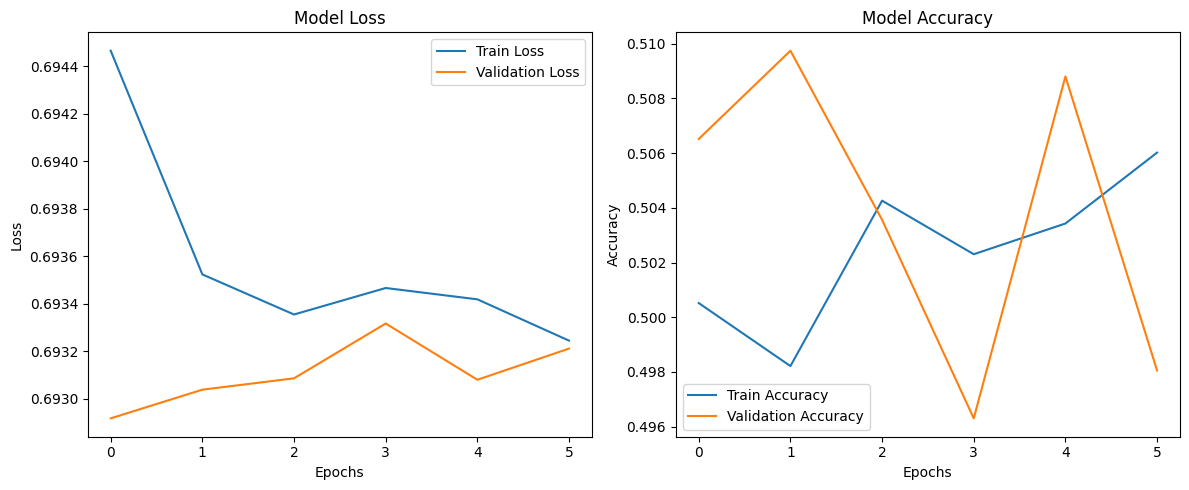

Training Accuracy: 0.5069
Validation Accuracy: 0.5065
233/233 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
Confusion Matrix:
[[2359 1376]
 [2297 1411]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.56      3735
           1       0.51      0.38      0.43      3708

    accuracy                           0.51      7443
   macro avg       0.51      0.51      0.50      7443
weighted avg       0.51      0.51      0.50      7443



In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# Get the input shape from your training data
_, timesteps, n_features = X_train.shape

# Create the LSTM model
def create_lstm_model(timesteps, n_features):
    model = Sequential()
    
    # First LSTM layer with return sequences for stacking
    model.add(LSTM(64, return_sequences=True, 
                   input_shape=(timesteps, n_features)))
    model.add(Dropout(0.2))
    
    # Second LSTM layer
    model.add(LSTM(32))
    model.add(Dropout(0.2))
    
    # Output layers
    model.add(Dense(16))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create model
model = create_lstm_model(timesteps, n_features)

# Print model summary
model.summary()

# Set up callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Make predictions on validation set
y_pred = (model.predict(X_val) > 0.5).astype(int).flatten()

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

In [110]:
print(model.summary())
print("Number of epochs ran:", len(history.history['loss']))
print("Batch size used:", 64)
print("Optimizer used:", model.optimizer.__class__.__name__)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 90, 64)         │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,861 (397.90 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,908 (265.27 KB)

None
Number of epochs ran: 8
Batch size used: 64
Optimizer used: Adam
